In [2]:
from matplotlib import pyplot as plt

In [45]:

F_LS = 0
F_LA = 1
def get_f_ls_f_la(dd, t_lem, t_lep, t_lse):
    if dd < t_lma:
        return 1, 1
    elif dd < t_lem + t_lep:
        f_LS = 1
        f_LA = 1 - (dd - t_lem) / (t_lep + t_lse)
        return f_LS, f_LA
    elif dd < t_lem + t_lep + t_lse:
        f_LS = 1 - (dd - t_lem - t_lep) / t_lse
        f_LA = 1 - (dd - t_lem) / (t_lep + t_lse)
        return f_LS, f_LA
    else:
        return 0, 0

def fls_fla_vals(t_lem, t_lep, t_lse):
    return [get_f_ls_f_la(dd, t_lem, t_lep, t_lse) for dd in range(365)]



In [57]:
# INITIAL t_l VALUES
t_lem_constant = 0.15
t_lse_constant = 0.33
# 
t_l = 200
t_lem = t_l * t_lem_constant
t_lma = t_l - t_lem
t_lse = t_lma * t_lse_constant
t_lep = t_l - (t_lem + t_lse)
t_l, t_lem, t_lma, t_lep, t_lse


(200, 30.0, 170.0, 113.9, 56.1)

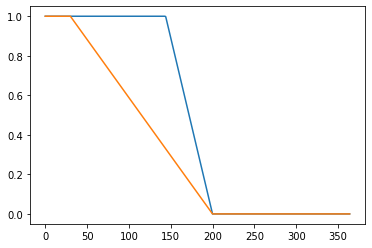

In [58]:
plt.plot([v[F_LS] for v in fls_fla_vals(t_lem, t_lep, t_lse)], label="no ozone")
plt.plot([v[F_LA] for v in fls_fla_vals(t_lem, t_lep, t_lse)], label="no ozone")

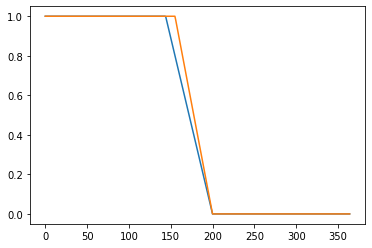

In [59]:

"""CURRENT APPROACH
This approach calculates the ozone impact on t_lma then recalculates the 
other values assuming t_l is constant.
"""
plt.plot([v[F_LS] for v in fls_fla_vals(t_lem, t_lep, t_lse)], label="no ozone")
fO3_l = 0.8
# OZONE DAMAGE EFFECT
t_lma_O3 = (t_lep + t_lse) * fO3_l  # eq 16 # reduces estimated leaf age by accumulated fst
t_lse_O3 = t_lse_constant * t_lma_O3  # make senescing period 0.33 * life span of mature leaf
# non senescing period assumed to be remaining time
t_lep_O3 = t_lma_O3 - t_lse_O3

t_lem_O3 = t_l - t_lma_O3
plt.plot([v[F_LS] for v in fls_fla_vals(t_lem_O3, t_lep_O3, t_lse_O3)], label="ozone")

170.0 113.9 56.1


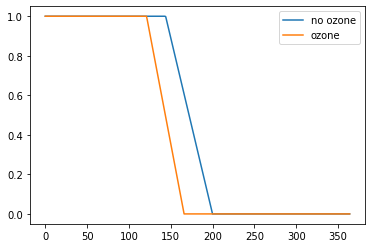

In [60]:
"""APPROACH B
This approach calculates the ozone impact on t_lma then recalculates the 
other values assuming t_lem is constant
"""
plt.plot([v[F_LS] for v in fls_fla_vals(t_lem, t_lep, t_lse)], label="no ozone")
fO3_l = 0.8
# OZONE DAMAGE EFFECT
print(t_lma, t_lep, t_lse)
t_lma_O3 = (t_lep + t_lse) * fO3_l  # eq 16 # reduces estimated leaf age by accumulated fst
t_lse_O3 = t_lse_constant * t_lma_O3  # make senescing period 0.33 * life span of mature leaf
# non senescing period assumed to be remaining time
t_lep_O3 = t_lma_O3 - t_lse_O3
assert t_lse > t_lse_O3
assert t_lep > t_lep_O3
plt.plot([v[F_LS] for v in fls_fla_vals(t_lem, t_lep_O3, t_lse_O3)], label="ozone")
plt.legend()